<a href="https://colab.research.google.com/github/lizzyzacharias/Gold-Standard-Pipeline-Guide/blob/main/Week3_Pheochromocytoma_Paraganglioma_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To solve the question: "What's the relationship between the VHL gene and Pheochromocytoma and Paraganglioma when considering the influence of age?"

### 1. Data Preprocessing

In [2]:
# This cell is only for use on Google Colab

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA/TCGA_Pheochromocytoma_Paraganglioma_(PCPG)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz  TCGA.PCPG.sampleMap_PCPG_clinicalMatrix


In [3]:
!pip install sparse_lmm

In [4]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.PCPG.sampleMap_PCPG_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [5]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,_GENOMIC_ID_TCGA_PCPG_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_PCPG_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PCPG_miRNA_HiSeq,_GENOMIC_ID_data/public/TCGA/PCPG/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PCPG_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_PCPG_RPPA,_GENOMIC_ID_TCGA_PCPG_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_PCPG_gistic2,_GENOMIC_ID_TCGA_PCPG_PDMRNAseq,_GENOMIC_ID_TCGA_PCPG_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,2dc9f559-fbfd-4290-82d2-e65bc3d8c0e4,NaN,TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX-01A-11D-A35D-08,BF79A366-BA96-4CA3-B44C-50D267EF389E,TCGA-P7-A5NX-01A-11D-A35D-08,NaN,TCGA-P7-A5NX-01,2dc9f559-fbfd-4290-82d2-e65bc3d8c0e4
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,f9d224fb-5f3b-4261-8625-29c117b0b56c,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01A-12D-A35D-08,NaN,TCGA-P7-A5NY-01A-12D-A35D-08,TCGA-P7-A5NY-01A-12D-A35C-01,TCGA-P7-A5NY-01,f9d224fb-5f3b-4261-8625-29c117b0b56c
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,08f40bb8-22b9-4fe3-be97-6041aafe35e7,NaN,TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY-05A-11D-A35D-08,NaN,TCGA-P7-A5NY-05A-11D-A35D-08,NaN,NaN,08f40bb8-22b9-4fe3-be97-6041aafe35e7
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,f8c789c9-629e-4a36-9cbf-2e52ecabe74c,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01A-11D-A35D-08,A3F29179-7C6D-4A8A-A549-661F5283FFEB,TCGA-P8-A5KC-01A-11D-A35D-08,TCGA-P8-A5KC-01A-11D-A35C-01,TCGA-P8-A5KC-01,f8c789c9-629e-4a36-9cbf-2e52ecabe74c
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,d0c544ce-2fab-4111-8351-8595a0089b31,NaN,TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,NaN,NaN,NaN,NaN,NaN,d0c544ce-2fab-4111-8351-8595a0089b31


In [6]:
# Display gene dataset
gene_data.head()

,TCGA-S7-A7WN-01,TCGA-WB-A80V-01,TCGA-P7-A5NY-05,TCGA-S7-A7WR-01,TCGA-WB-A814-01,TCGA-P8-A6RY-01,TCGA-RW-A67X-01,TCGA-SP-A6QK-01,TCGA-W2-A7HA-01,TCGA-QR-A70O-01,...,TCGA-RM-A68W-01,TCGA-QR-A705-01,TCGA-QR-A70X-01,TCGA-RW-A68C-01,TCGA-QR-A6H5-01,TCGA-RW-A680-01,TCGA-SR-A6N0-01,TCGA-SR-A6MT-01,TCGA-WB-A815-01,TCGA-SP-A6QD-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.117308,-0.051992,0.675108,0.883508,1.499708,-1.021492,1.069208,0.669808,0.903608,1.306508,...,-0.455392,0.055908,0.601308,0.903808,0.840708,-0.491592,-0.607392,-0.425892,1.521508,0.484408
HIF3A,-0.740226,-2.580126,-3.947126,-2.035026,-2.324126,2.671774,-0.305426,1.902974,-1.044826,-0.473426,...,1.278374,-1.912526,1.009274,0.351774,0.420674,0.918574,0.882974,-2.068026,-0.919026,1.243674
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.334765,0.088865,0.229065,-0.531035,-0.531035,...,1.827465,-0.531035,-0.531035,-0.531035,-0.531035,4.835765,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.264728,0.050628,-0.443072,-0.355772,-0.130472,0.178728,0.004228,0.262228,-0.433472,0.016528,...,0.361928,-0.154672,0.004328,0.209928,-0.175572,0.279128,0.165628,0.351828,0.033528,-0.172172
RNF11,0.378022,0.910222,0.647422,0.354322,0.815522,1.334322,0.633822,0.580222,0.277022,-0.144478,...,0.507622,1.407222,0.718522,0.897922,0.876122,-0.358278,0.782322,1.231222,1.112122,1.260022


In [7]:
# Set Basic info

gene_fullname = 'VHL gene'
gene = 'vhl'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Pheochromocytoma and Paraganglioma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 77 features, and the gene dataset includes 20530 genes


In [8]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,-0.123378,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,-0.401978,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,-0.748878,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,-0.748878,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,-0.748878,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788


In [9]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,-28497,-0.249192,0.627774,-0.531035,-0.122972,1.240822,-0.79301,0.262206,0.829154,-0.423399,...,-0.123378,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988
TCGA-P7-A5NY-01,-7834,0.931208,-0.483626,-0.531035,-0.408272,0.794222,0.04209,0.433806,0.209954,-0.423399,...,-0.401978,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388
TCGA-P7-A5NY-05,-7834,0.675108,-3.947126,-0.531035,-0.443072,0.647422,-0.57541,0.215106,0.779154,-0.423399,...,-0.748878,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788
TCGA-P8-A5KC-01,-17790,0.386208,1.778974,-0.531035,0.003528,0.668822,0.13079,-0.228694,3.333554,-0.423399,...,-0.748878,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588
TCGA-P8-A5KC-11,-17790,-0.530592,1.908874,-0.531035,0.877428,0.607622,-0.15621,-0.334894,1.183554,-0.423399,...,-0.748878,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788


In [10]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,-28497,-0.249192,0.627774,-0.531035,-0.122972,1.240822,-0.79301,0.262206,0.829154,-0.423399,...,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988,1
TCGA-P7-A5NY-01,-7834,0.931208,-0.483626,-0.531035,-0.408272,0.794222,0.04209,0.433806,0.209954,-0.423399,...,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388,1
TCGA-P7-A5NY-05,-7834,0.675108,-3.947126,-0.531035,-0.443072,0.647422,-0.57541,0.215106,0.779154,-0.423399,...,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788,1
TCGA-P8-A5KC-01,-17790,0.386208,1.778974,-0.531035,0.003528,0.668822,0.13079,-0.228694,3.333554,-0.423399,...,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588,1
TCGA-P8-A5KC-11,-17790,-0.530592,1.908874,-0.531035,0.877428,0.607622,-0.15621,-0.334894,1.183554,-0.423399,...,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788,0


In [11]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

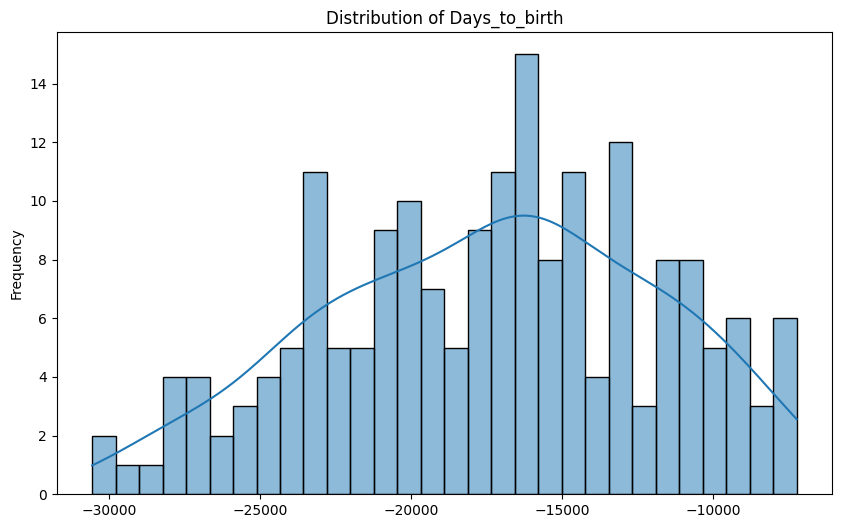

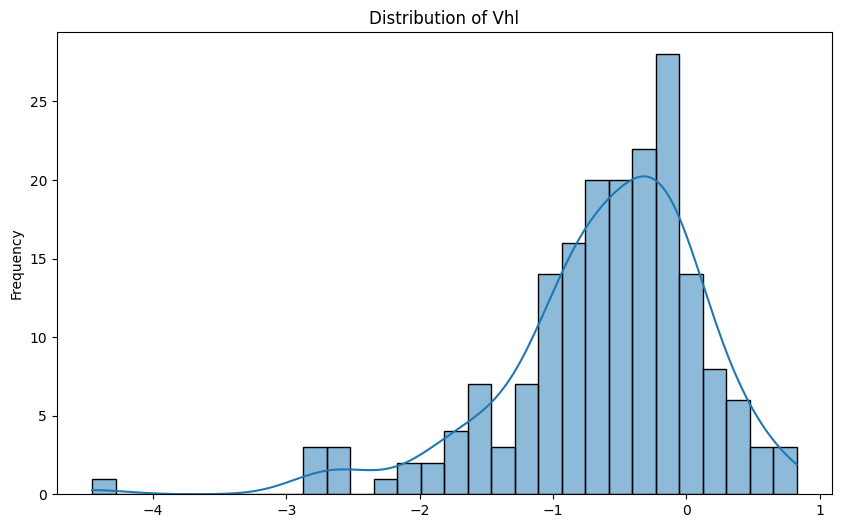

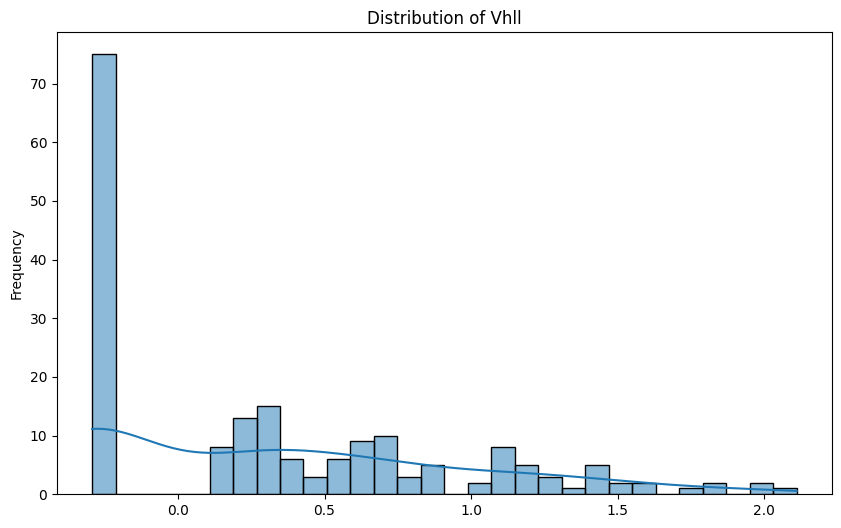

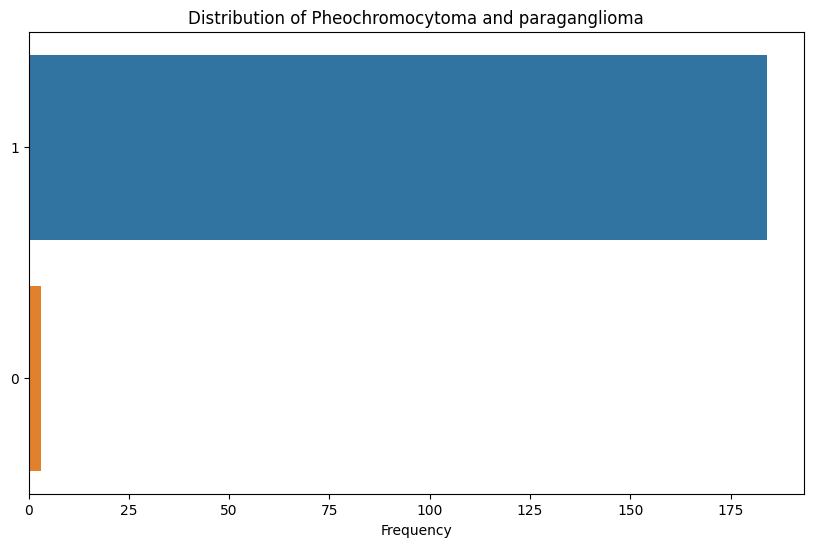

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

Then, draw scatter plots to visualize the relationship between pairs of variables (Optional)

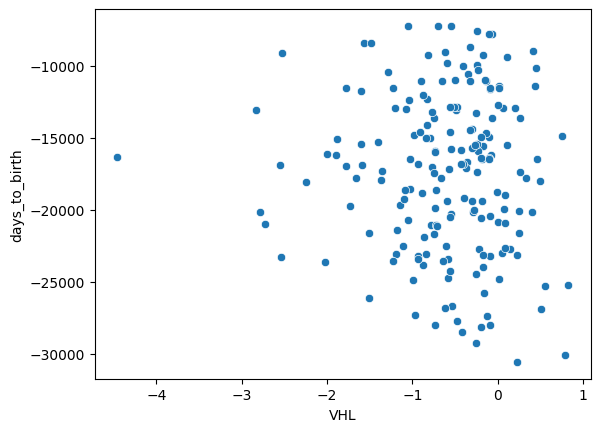

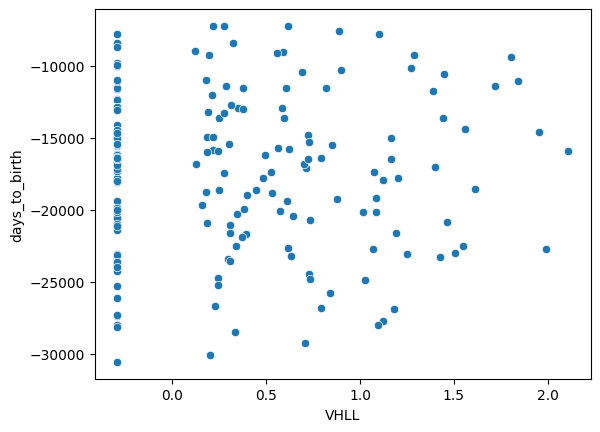

In [16]:
sns.scatterplot(data=merged_data, x='VHL', y='days_to_birth')
plt.show()
sns.scatterplot(data=merged_data, x='VHLL', y='days_to_birth')
plt.show()

In [17]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,78,-0.249192,0.627774,-0.531035,-0.122972,1.240822,-0.79301,0.262206,0.829154,-0.423399,...,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988,1
TCGA-P7-A5NY-01,21,0.931208,-0.483626,-0.531035,-0.408272,0.794222,0.04209,0.433806,0.209954,-0.423399,...,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388,1
TCGA-P7-A5NY-05,21,0.675108,-3.947126,-0.531035,-0.443072,0.647422,-0.57541,0.215106,0.779154,-0.423399,...,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788,1
TCGA-P8-A5KC-01,48,0.386208,1.778974,-0.531035,0.003528,0.668822,0.13079,-0.228694,3.333554,-0.423399,...,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588,1
TCGA-P8-A5KC-11,48,-0.530592,1.908874,-0.531035,0.877428,0.607622,-0.15621,-0.334894,1.183554,-0.423399,...,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788,0


### 3. Do regression & Cross Validation

In [18]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

<ipython-input-18-168e47ada711>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.9630387143900657


In [19]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [20]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For vhl:
VHL: Coefficient = -0.0006778191160639404, p-value = 0.9652908892961458
VHLL: Coefficient = -0.0026125986480733904, p-value = 0.7288661367138705

For age:
age: Coefficient = 0.0063885999884919775, p-value = 0.3865922780549469



### 4. Discussion

In [21]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between VHL gene and Pheochromocytoma and Paraganglioma when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the VHL gene and Pheochromocytoma and Paraganglioma when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the VHL gene and Pheochromocytoma and Paraganglioma when considering the influence of age.




In [22]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: VHL
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: VHLL
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).




In [23]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: VHL
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the VHL gene and Pheochromocytoma and Paraganglioma when considering the influence of age.

Variable: VHLL
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the VHLL gene and Pheochromocytoma and Paraganglioma when considering the influence of age.


